## SEGUNDO ANÁLISIS ELIMINANDO OUTLIERS DE LOS DATOS.

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pyod.models.knn import KNN

In [126]:
data = pd.read_csv("../outputs/house_fit.csv", index_col=0)

In [127]:
data.head()

,house_type_id,is_renewal_needed,is_new_development,m2,n_rooms,n_bathrooms,floor,is_exterior,has_lift,has_parking,has_storage_room,has_terrace,has_balcony,has_pool,latitude,longitude,buy_price
0,0,0,0,64.0,2,1.0,3.0,1,0,0,0,0,0,0,40.343263,-3.688352,85000
1,0,1,0,70.0,3,1.0,4.0,1,1,0,0,1,0,0,40.355109,-3.700105,129900
2,0,0,0,94.0,2,2.0,1.0,1,1,0,1,0,0,0,40.345539,-3.710970,144247
3,0,0,0,64.0,2,1.0,0.0,1,1,0,1,0,0,0,40.345539,-3.710970,109900
4,0,0,0,108.0,2,2.0,4.0,1,1,1,1,0,0,1,40.355841,-3.688399,260000


In [128]:
# Eliminamos los outliers

clf = KNN(contamination=0.5, method="largest", algorithm="auto")
clf.fit(data)
y_pred = clf.predict(data)
dropea = data[y_pred == 1]
data = data.drop(dropea.index)

In [129]:
# Vamos a analizar nuestra tabla resultante.

data.describe()

,house_type_id,is_renewal_needed,is_new_development,m2,n_rooms,n_bathrooms,floor,is_exterior,has_lift,has_parking,has_storage_room,has_terrace,has_balcony,has_pool,latitude,longitude,buy_price
count,9760.000000,9760.000000,9760.000000,9760.000000,9760.000000,9760.000000,9760.000000,9760.000000,9760.000000,9760.000000,9760.000000,9760.000000,9760.000000,9760.000000,9760.000000,9760.000000,9.760000e+03
mean,0.100102,0.192828,0.020082,100.682787,2.639754,1.620799,2.477510,0.889857,0.729713,0.271414,0.289549,0.384119,0.160451,0.158607,40.422271,-3.690365,4.215368e+05
std,0.404808,0.394539,0.140288,57.739501,1.032586,0.830407,1.918565,0.313085,0.444131,0.444712,0.453576,0.486411,0.367042,0.365328,0.035269,0.035894,4.116967e+05
min,0.000000,0.000000,0.000000,25.000000,0.000000,1.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.339934,-3.828783,7.000000e+04
25%,0.000000,0.000000,0.000000,65.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.394683,-3.710970,1.790000e+05
50%,0.000000,0.000000,0.000000,85.000000,3.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.422742,-3.695211,2.990000e+05
75%,0.000000,0.000000,0.000000,116.000000,3.000000,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,40.445414,-3.667741,5.200000e+05
max,2.000000,1.000000,1.000000,562.000000,9.000000,7.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,40.520554,-3.546616,4.350000e+06


In [130]:
data.to_csv("../outputs/2_houses_without_outliers.csv")

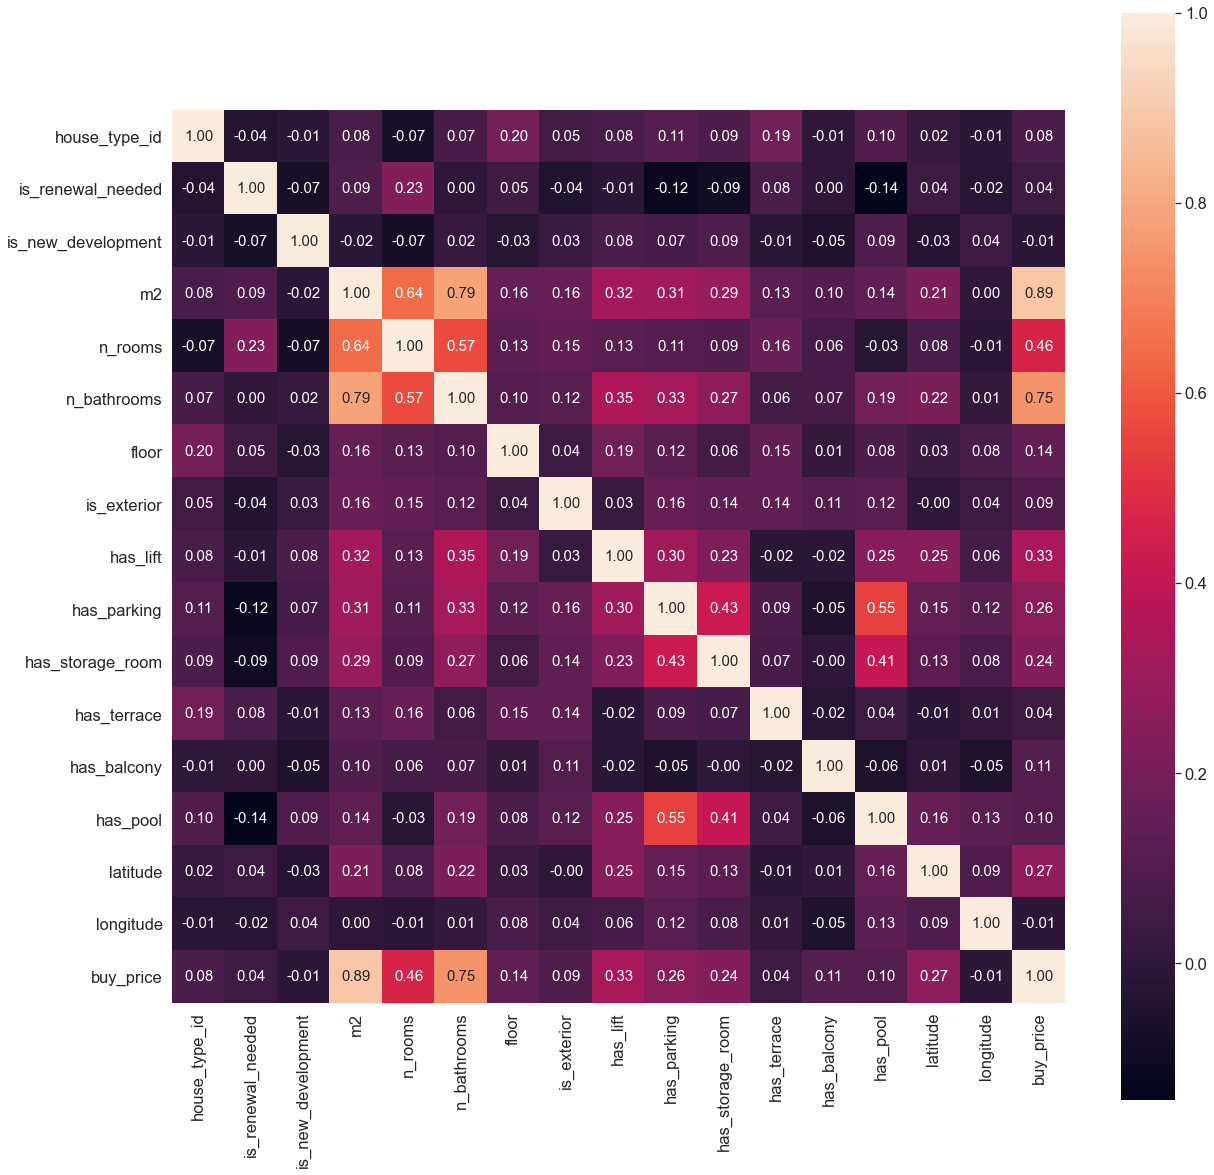

In [131]:
# Vamos a realizar un heatmap para ver la relación entre los datos.

cm = np.corrcoef(data.values.T)
sns.set(font_scale=1.5)
plt.figure(figsize=(20, 20))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15},
                yticklabels=data.columns, xticklabels=data.columns)

/usr/local/lib/python3.8/site-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


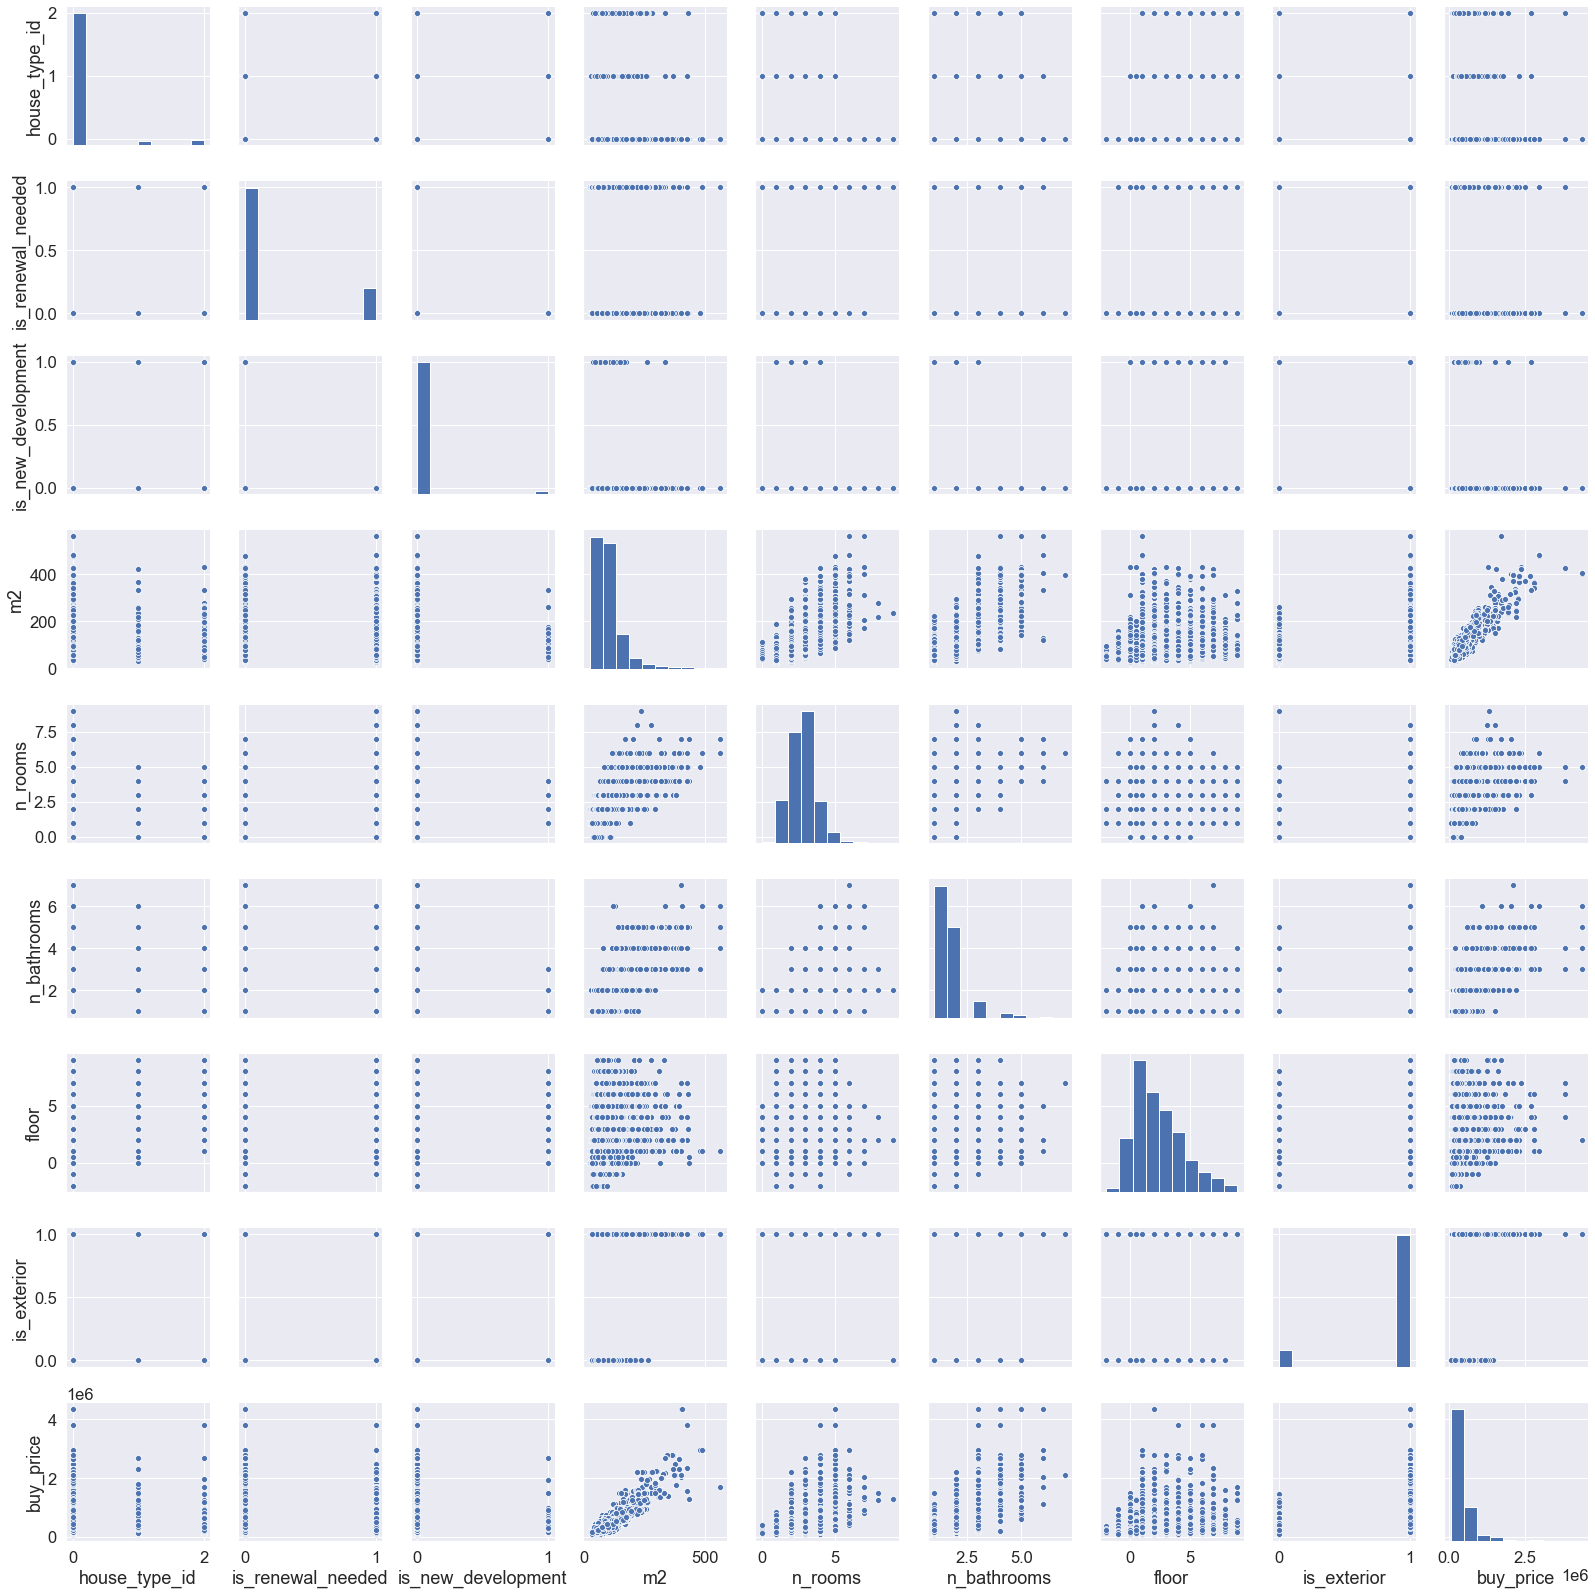

In [123]:
# Vamos a realizar ahora un pairplot para ver como se relacionan los datos entre sí.
# Como tenemos muchas features, vamos a dividirlas en dos análisis.

d_analysis_1 = data[["house_type_id", "is_renewal_needed", "is_new_development","m2", "n_rooms",
                    "n_bathrooms", "floor", "is_exterior", "buy_price"]]

sns.pairplot(data, size=2.5, vars=d_analysis_1)
plt.tight_layout()

/usr/local/lib/python3.8/site-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


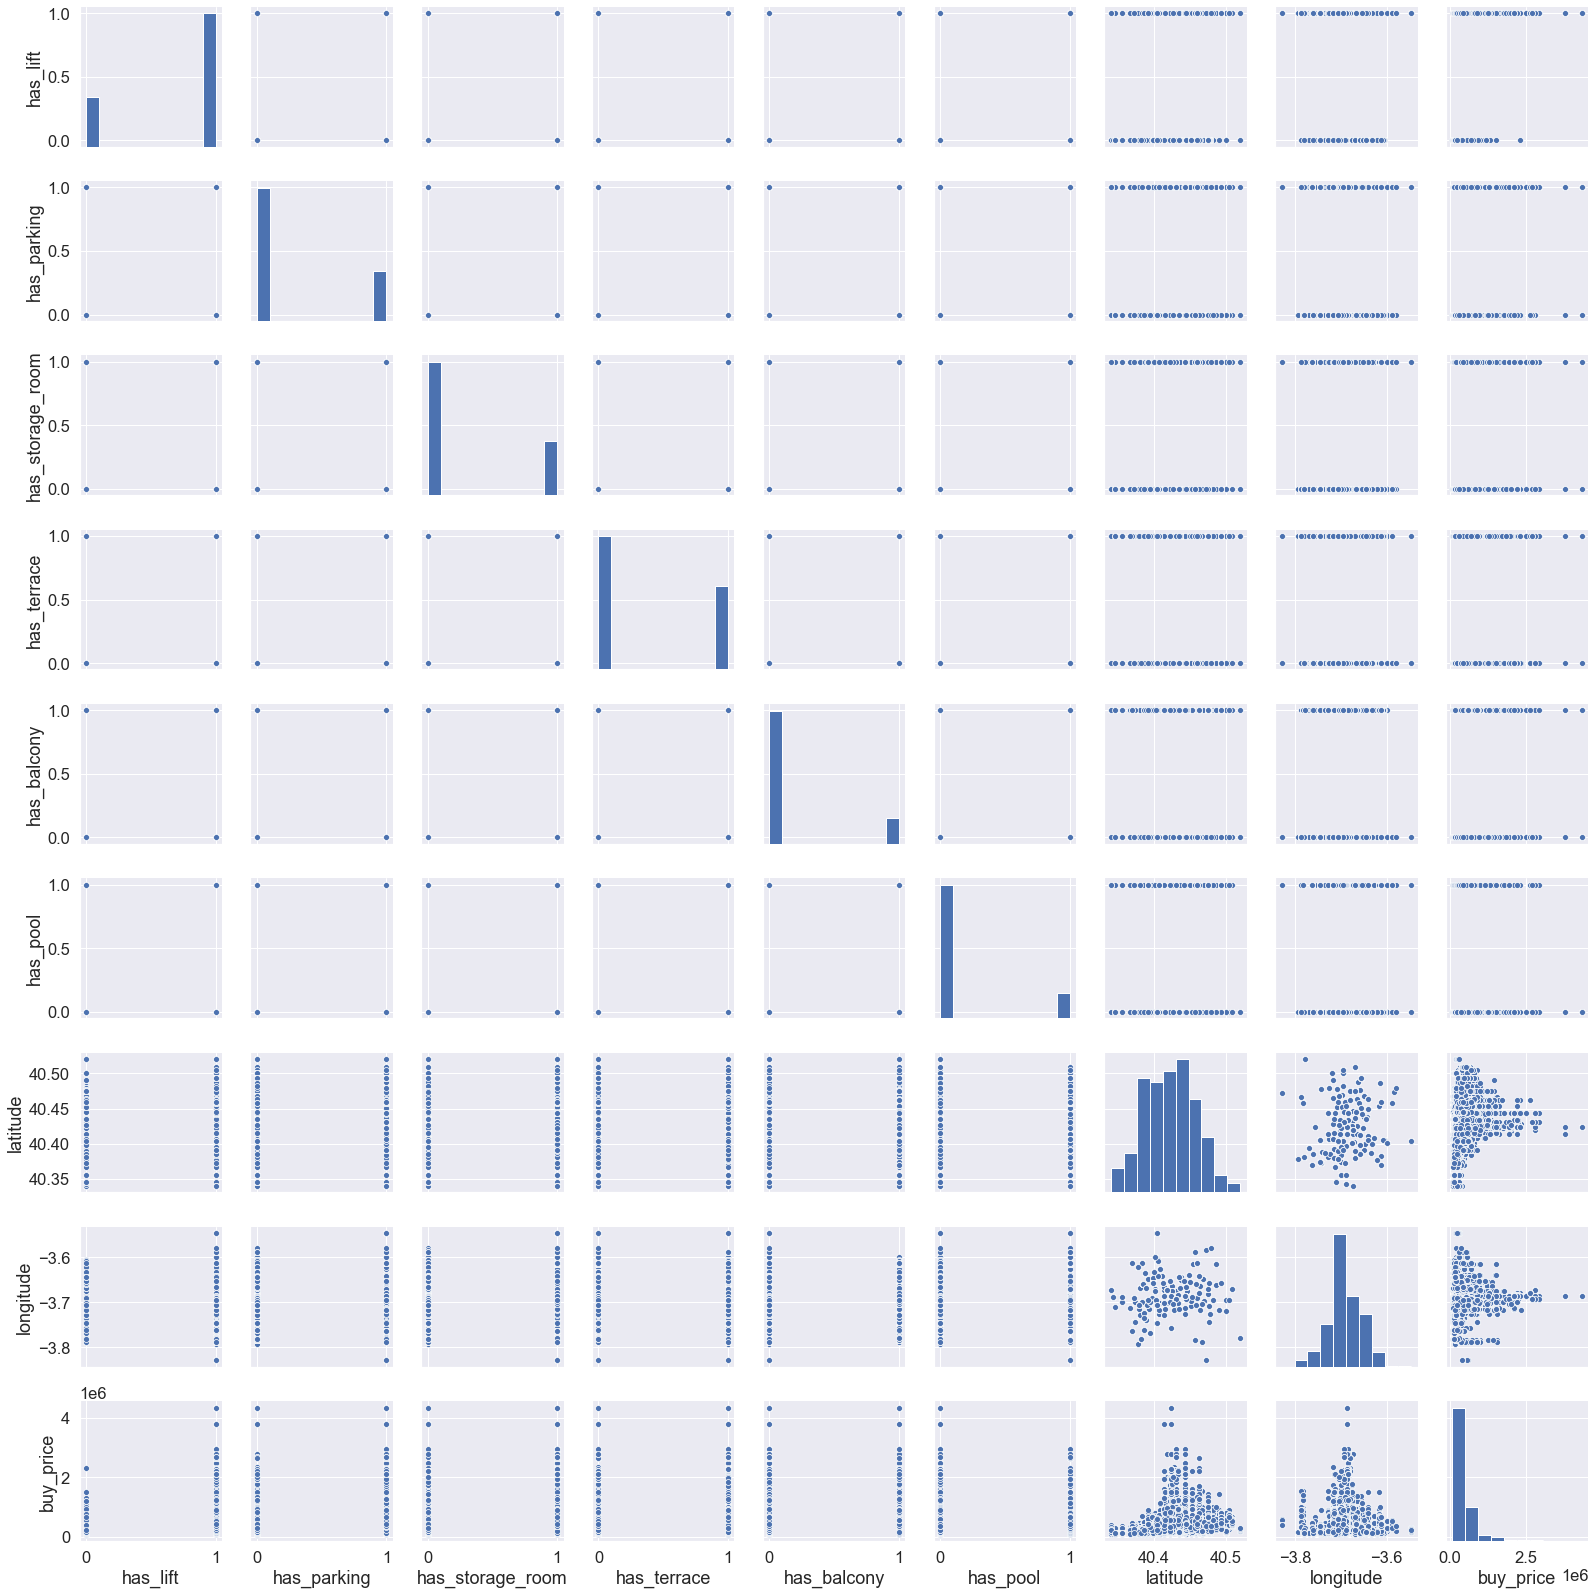

In [124]:
d_analysis_2 = data[["has_lift", "has_parking", "has_storage_room", "has_terrace",
              "has_balcony", "has_pool", "latitude", "longitude", "buy_price"]]

sns.pairplot(data, size=2.5, vars=d_analysis_2)
plt.tight_layout()

## Nos metemos ya de lleno con el entrenamiento de nuestro modelo.

### Empezaremos entrenando los datos con el módulo sklearn.

In [8]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor, VotingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [9]:
X = data.drop(["buy_price"], axis=1)
y = data['buy_price']

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=7)

In [11]:
models = {"DecisionTree" : DecisionTreeRegressor(),
          "RandomForest": RandomForestRegressor(),
          "ExtraTrees" : ExtraTreesRegressor(),
          "GradientBoosting" : GradientBoostingRegressor(),
          "HistGradientBoosting": HistGradientBoostingRegressor(),
          "Voting": VotingRegressor(
              [('etr', ExtraTreesRegressor()),
               ('rf', RandomForestRegressor())]
          )
         }

In [12]:
# Entrenamos los datos

for name, model in models.items():
    print(f"Entrenando {name}")
    model.fit(X_train, y_train)
print("Entrenamiento finalizado")

Entrenando DecisionTree
Entrenando RandomForest
Entrenando ExtraTrees
Entrenando GradientBoosting
Entrenando HistGradientBoosting
Entrenando Voting
Entrenamiento finalizado


-------DecisionTree-------
RMSE 108054.758
R2 0.932
-------RandomForest-------
RMSE 72652.818
R2 0.969
-------ExtraTrees-------
RMSE 83414.48
R2 0.959
-------GradientBoosting-------
RMSE 93176.276
R2 0.949
-------HistGradientBoosting-------
RMSE 80317.19
R2 0.962
-------Voting-------
RMSE 75179.277
R2 0.967


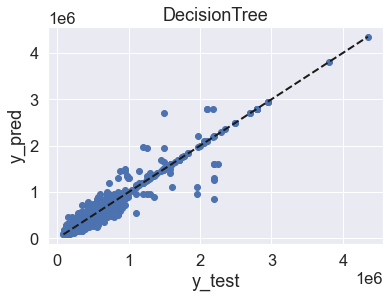

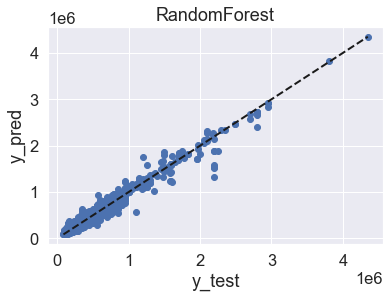

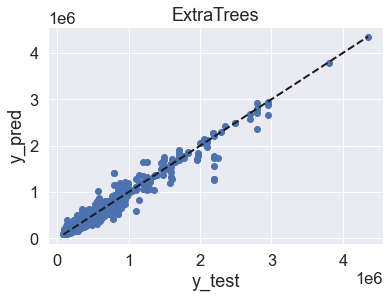

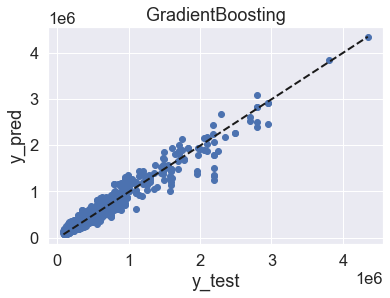

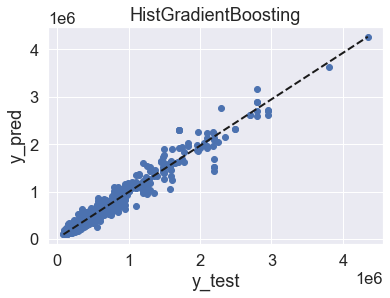

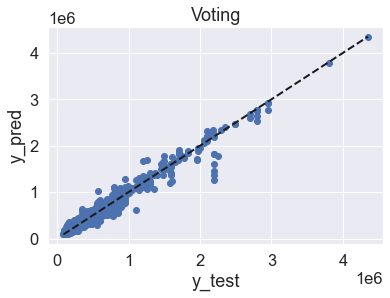

In [13]:
# Comprobamos el resultado de las métricas seleccionadas.

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"-------{name}-------")
    print("RMSE", round(np.sqrt(mean_squared_error(y_test,y_pred)),3))
    print("R2", round(r2_score(y_test,y_pred),3))
    plt.figure()
    plt.title(name)
    plt.scatter(y_test,y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], 'k--', lw=2)
    plt.xlabel("y_test")
    plt.ylabel("y_pred")

In [14]:
# Aplicamos un crossvalidation para ver cual es el modelo que mejor funciona.

for name, model in models.items():
    scores = cross_val_score(model,X,y, cv=10)
    print(f"{name} accuracy{np.mean(scores)}")

DecisionTree accuracy0.7432816319217143
RandomForest accuracy0.8780263369085295
ExtraTrees accuracy0.8604693273305951
GradientBoosting accuracy0.7700688029161736
HistGradientBoosting accuracy0.8789252902424719
Voting accuracy0.8781634007925204


In [15]:
# Como podemos comprobar, el modelo que mejores datos arroja de nuevo es RandomForest.
# Estos datos siguen sin ser buenos, si bien el R2 ha mejorado considerablemente (0.969), el RMSE sigue siendo 
# muy alto (72653 €).
# Sin embargo a la hora de realizar el crossvalidation, observamos que el modelo que mejor resultado arroja
# es el HistGradientBoosting.
# Como podemos ver en las gráficas, tras eliminar los outliers, hemos conseguido ajustar la dispersión.

### Vamos a entrenar nuestros datos con el módulo xgboost,  para ver si mejoran los resultados.

In [16]:
from xgboost import XGBRegressor

RMSE 74223.783
R2 0.968


Text(0, 0.5, 'y_pred')

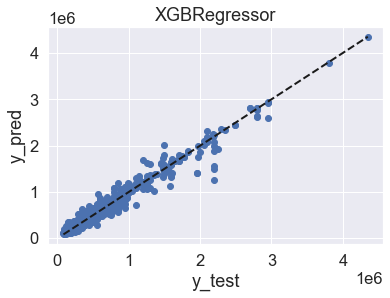

In [17]:
xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)
y_pred = xgbr.predict(X_test)
print("RMSE", round(np.sqrt(mean_squared_error(y_test,y_pred)),3))
print("R2", round(r2_score(y_test,y_pred),3))

# Ploteamos las gráficas.
plt.figure()
plt.title("XGBRegressor")
plt.scatter(y_test,y_pred)
plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], 'k--', lw=2)
plt.xlabel("y_test")
plt.ylabel("y_pred")

In [18]:
# Nuestros datos no mejoran los resultados obtenidos con el modelo RandomForestRegressor de sklearn.

### Vamos a entrenar ahora con el módulo H2O.

In [19]:
# Comprobamos ahora si con el módulo H2O podemos obtener aún mejores resultados.
# Vamos a trabajar con cuatro modelos:
    # H2OAutoML
    # H2ORandomForestEstimator.
    # H2OGradientBoostingEstimator.
    # H2OXGBoostEstimator.

In [20]:
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators import H2ORandomForestEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators import H2OXGBoostEstimator

h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: java version "14.0.1" 2020-04-14; Java(TM) SE Runtime Environment (build 14.0.1+7); Java HotSpot(TM) 64-Bit Server VM (build 14.0.1+7, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.8/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/67/cftjwrk93ll2_6bwxqr4mkzc0000gn/T/tmpdx1h2bf_
  JVM stdout: /var/folders/67/cftjwrk93ll2_6bwxqr4mkzc0000gn/T/tmpdx1h2bf_/h2o_Javi_started_from_python.out
  JVM stderr: /var/folders/67/cftjwrk93ll2_6bwxqr4mkzc0000gn/T/tmpdx1h2bf_/h2o_Javi_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Europe/Madrid
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.1.3
H2O_cluster_version_age:,17 days
H2O_cluster_name:,H2O_from_python_Javi_lbrz9m
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"accepting new members, healthy"


#### H2OAutoML

In [21]:
h2train = h2o.H2OFrame(data)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [22]:
X = list(data.drop(["buy_price"], axis=1))
y = "buy_price"

In [23]:
automl = H2OAutoML(max_runtime_secs=1200, sort_metric='RMSE')
automl.train(X, y, training_frame=h2train)
leader_board = automl.leaderboard
leader_board.head()

AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,rmse,mean_residual_deviance,mse,mae,rmsle
StackedEnsemble_AllModels_AutoML_20201015_153108,66112.8,4.37091e+09,4.37091e+09,37412.5,0.142979
StackedEnsemble_BestOfFamily_AutoML_20201015_153108,67519.4,4.55887e+09,4.55887e+09,38308.1,0.145921
GBM_grid__1_AutoML_20201015_153108_model_6,69848.5,4.87881e+09,4.87881e+09,40102.2,0.15166
XGBoost_grid__1_AutoML_20201015_153108_model_16,71107.9,5.05633e+09,5.05633e+09,39676.3,0.154195
XGBoost_grid__1_AutoML_20201015_153108_model_24,71307.2,5.08472e+09,5.08472e+09,39758.7,0.153401
GBM_grid__1_AutoML_20201015_153108_model_1,71313.9,5.08568e+09,5.08568e+09,41020.2,0.152923
GBM_grid__1_AutoML_20201015_153108_model_13,71795,5.15452e+09,5.15452e+09,43183.1,0.156891
GBM_grid__1_AutoML_20201015_153108_model_18,71800.6,5.15532e+09,5.15532e+09,40650.5,0.15131
GBM_grid__1_AutoML_20201015_153108_model_3,72399.2,5.24164e+09,5.24164e+09,43514.7,0.157685
XGBoost_grid__1_AutoML_20201015_153108_model_35,72573.9,5.26697e+09,5.26697e+09,40931.1,0.155981


In [66]:
# Con el modelo StackedEnsemble_AllModels_AutoML obtenemos un rsme mejor (66000 €).

#### Importamos ahora el csv para trabajar con el resto de modelos.

In [67]:
data = h2o.import_file("../outputs/2_houses_without_outliers.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [68]:
data.describe()

Rows:9760
Cols:18




,C1,house_type_id,is_renewal_needed,is_new_development,m2,n_rooms,n_bathrooms,floor,is_exterior,has_lift,has_parking,has_storage_room,has_terrace,has_balcony,has_pool,latitude,longitude,buy_price
type,int,int,int,int,int,int,int,real,int,int,int,int,int,int,int,real,real,int
mins,0.0,0.0,0.0,0.0,25.0,0.0,1.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.3399339,-3.828782660082677,70000.0
mean,8661.035348360656,0.10010245901639343,0.192827868852459,0.020081967213114754,100.6827868852459,2.639754098360655,1.6207991803278692,2.477510245901639,0.8898565573770492,0.7297131147540984,0.2714139344262295,0.28954918032786886,0.3841188524590164,0.16045081967213115,0.15860655737704918,40.42227088048155,-3.690365473140639,421536.83268442634
maxs,17397.0,2.0,1.0,1.0,562.0,9.0,7.0,9.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,40.5205538,-3.5466159,4350000.0
sigma,5003.357843170395,0.4048076560534978,0.39453926387987087,0.14028791206284635,57.73950099561423,1.0325859649250255,0.8304074734882572,1.9185647809303805,0.31308450600178833,0.4441307185566234,0.4447118997837766,0.4535763789591471,0.48641114401053753,0.3670424463648468,0.36532751325882956,0.03526943248197005,0.035893998002644506,411696.68241825653
zeros,1,9143,7878,9564,0,19,0,1037,1075,2638,7111,6934,6011,8194,8212,0,0,0
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0.0,0.0,0.0,0.0,64.0,2.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,40.34326305,-3.688352297394898,85000.0
1,1.0,0.0,1.0,0.0,70.0,3.0,1.0,4.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,40.3551089,-3.7001047141537535,129900.0
2,3.0,0.0,0.0,0.0,64.0,2.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,40.3455389,-3.7109697,109900.0


In [69]:
X = data.col_names[1:-1]
y = data.col_names[-1]

train, test =data.split_frame([0.8], seed=1234)
train.shape, test.shape

((7847, 18), (1913, 18))

#### H2ORandomForestEstimator

In [70]:
rf_h2o = H2ORandomForestEstimator()
rf_h2o.train(X, y, training_frame=train)
print(rf_h2o)

drf Model Build progress: |███████████████████████████████████████████████| 100%
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1602768662645_4


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,2394623.0,20.0,20.0,20.0,3571.0,3976.0,3804.64




ModelMetricsRegression: drf
** Reported on train data. **

MSE: 6293881376.295682
RMSE: 79333.986262482
MAE: 44166.539124843315
RMSLE: 0.15910631799276248
Mean Residual Deviance: 6293881376.295682

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2020-10-15 16:00:58,0.022 sec,0.0,NaN,NaN,NaN
1,,2020-10-15 16:00:58,0.372 sec,1.0,126257.643561,64634.673606,1.594099e+10
2,,2020-10-15 16:00:59,0.638 sec,2.0,129857.532088,63969.746650,1.686298e+10
3,,2020-10-15 16:00:59,0.930 sec,3.0,121306.475422,60835.614287,1.471526e+10
4,,2020-10-15 16:00:59,1.236 sec,4.0,123366.229464,61148.600929,1.521923e+10
5,,2020-10-15 16:00:59,1.433 sec,5.0,115242.394453,58715.836652,1.328081e+10
6,,2020-10-15 16:01:00,1.595 sec,6.0,109957.933278,56888.885762,1.209075e+10
7,,2020-10-15 16:01:00,1.797 sec,7.0,111776.916581,56700.469944,1.249408e+10
8,,2020-10-15 16:01:00,2.016 sec,8.0,108041.093132,55335.161292,1.167288e+10
9,,2020-10-15 16:01:00,2.261 sec,9.0,104207.904196,54335.687496,1.085929e+10



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,m2,2.467390e+16,1.000000,0.498638
1,n_bathrooms,1.153484e+16,0.467492,0.233109
2,latitude,4.277777e+15,0.173373,0.086450
3,n_rooms,3.782631e+15,0.153305,0.076444
4,longitude,1.859867e+15,0.075378,0.037586
5,has_lift,8.489714e+14,0.034408,0.017157
6,floor,6.818763e+14,0.027636,0.013780
7,has_parking,5.582491e+14,0.022625,0.011282
8,has_storage_room,3.705186e+14,0.015017,0.007488
9,has_terrace,2.613441e+14,0.010592,0.005282


In [71]:
# Vamos a comprobar que no tenemos overfitting entre los datos entrenados y los datos del test.

# Datos entrenados.
print("-------train metrics-------")
print("RMSE: ", round(rf_h2o.rmse(),3))
print("R2: ", round(rf_h2o.r2(),3))

# Datos test.
print("-------test metrics-------")
print("RMSE: ", rf_h2o.model_performance(test).rmse())
print("R2: ", rf_h2o.model_performance(test).r2())

-------train metrics-------
RMSE:  79333.986
R2:  0.963
-------test metrics-------
RMSE:  74885.49209785089
R2:  0.9681521744081425


In [72]:
# Como podemos observar los valores están muy equilibrados.

In [73]:
predict = rf_h2o.predict(test)

drf prediction progress: |████████████████████████████████████████████████| 100%


RMSE:  74885.49209785089
R2:  0.9681521744081425


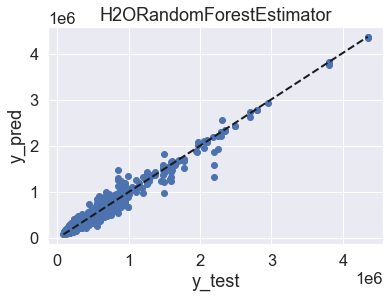

In [115]:
# Plots y relación test, predict.
y_pred = predict.as_data_frame()
y_test = test[-1].as_data_frame()
print("RMSE: ", rf_h2o.model_performance(test, predict).rmse())
print("R2: ", rf_h2o.model_performance(test, predict).r2())
plt.figure()
plt.title("H2ORandomForestEstimator")
plt.scatter(y_test,y_pred)
plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], 'k--', lw=2)
plt.xlabel("y_test")
plt.ylabel("y_pred");

In [75]:
# Existe menos dispersión de los datos.
# Existe un mayor número de viviendas valoradas por debajo de su precio real.

In [76]:
print(predict, test[-1])

predict
263481
140056
147539
105573
139700
307000
223117
115294
120313
237430


buy_price
260000
129900
138000
85000
139000
275000
179000
123000
110000
220000


#### H2OGradientBoostingEstimator

In [77]:
gbm_h2o = H2OGradientBoostingEstimator()
gbm_h2o.train(X, y, training_frame=train)
print(gbm_h2o)

gbm Model Build progress: |███████████████████████████████████████████████| 100%
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_model_python_1602768662645_5


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,20754.0,5.0,5.0,5.0,19.0,32.0,28.34




ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 5137526445.03643
RMSE: 71676.54040923313
MAE: 47191.327338473304
RMSLE: 0.16911007740322476
Mean Residual Deviance: 5137526445.03643

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2020-10-15 16:01:08,0.002 sec,0.0,409696.684570,253961.841475,1.678514e+11
1,,2020-10-15 16:01:08,0.019 sec,1.0,372378.089929,231733.998021,1.386654e+11
2,,2020-10-15 16:01:08,0.032 sec,2.0,339038.967118,211711.544583,1.149474e+11
3,,2020-10-15 16:01:08,0.040 sec,3.0,309372.952255,193982.650794,9.571162e+10
4,,2020-10-15 16:01:08,0.051 sec,4.0,282842.699092,178182.045650,7.999999e+10
5,,2020-10-15 16:01:08,0.059 sec,5.0,259329.137003,164128.462434,6.725160e+10
6,,2020-10-15 16:01:08,0.067 sec,6.0,238441.589135,151569.489506,5.685439e+10
7,,2020-10-15 16:01:08,0.075 sec,7.0,219818.684227,140626.370615,4.832025e+10
8,,2020-10-15 16:01:08,0.082 sec,8.0,203461.522465,130648.416959,4.139659e+10
9,,2020-10-15 16:01:08,0.090 sec,9.0,188765.838726,122059.607963,3.563254e+10



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,m2,5.794432e+15,1.000000,0.862256
1,latitude,4.587774e+14,0.079176,0.068270
2,longitude,1.645617e+14,0.028400,0.024488
3,n_bathrooms,1.303742e+14,0.022500,0.019401
4,n_rooms,4.983996e+13,0.008601,0.007417
5,has_lift,4.835359e+13,0.008345,0.007195
6,floor,2.860910e+13,0.004937,0.004257
7,has_pool,1.732735e+13,0.002990,0.002578
8,has_terrace,9.715569e+12,0.001677,0.001446
9,is_renewal_needed,7.355573e+12,0.001269,0.001095


In [78]:
# Vamos a comprobar que no tenemos overfitting entre los datos entrenados y los datos del test.

# Datos entrenados.
print("-------train metrics-------")
print("RMSE: ", round(gbm_h2o.rmse(),3))
print("R2: ", round(gbm_h2o.r2(),3))

# Datos test.
print("-------test metrics-------")
print("RMSE: ", gbm_h2o.model_performance(test).rmse())
print("R2: ", gbm_h2o.model_performance(test).r2())

-------train metrics-------
RMSE:  71676.54
R2:  0.969
-------test metrics-------
RMSE:  85764.1559388934
R2:  0.9582269634690429


In [79]:
# Como podemos observar, existe algo de overfitting.

In [80]:
predict = gbm_h2o.predict(test)

gbm prediction progress: |████████████████████████████████████████████████| 100%


RMSE:  85764.1559388934
R2:  0.9582269634690429


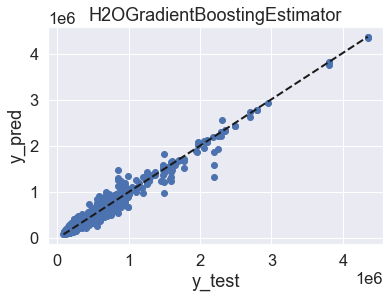

In [114]:
# Plots y relación test, predict.
y_pred = predict.as_data_frame()
y_test = test[-1].as_data_frame()
print("RMSE: ", gbm_h2o.model_performance(test, predict).rmse())
print("R2: ", gbm_h2o.model_performance(test, predict).r2())
plt.figure()
plt.title("H2OGradientBoostingEstimator")
plt.scatter(y_test,y_pred)
plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], 'k--', lw=2)
plt.xlabel("y_test")
plt.ylabel("y_pred");

In [82]:
# Existe algo más de dispersión en los datos.
# La gran mayoría de las viviendas están valoradas por debajo de su precio real.

In [83]:
print(predict, test[-1])

predict
265489
165073
145702
111187
131789
287455
236005
137298
127874
209427


buy_price
260000
129900
138000
85000
139000
275000
179000
123000
110000
220000


#### H2OXGBoostEstimator

In [84]:
xgbm_h2o = H2OXGBoostEstimator()
xgbm_h2o.train(X, y, training_frame=train)
print(xgbm_h2o)

xgboost Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_model_python_1602768662645_6


Model Summary: 


,,number_of_trees
0,,50.0




ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 2030345716.4610803
RMSE: 45059.35770138186
MAE: 30852.8799849863
RMSLE: 0.12833645691732057
Mean Residual Deviance: 2030345716.4610803

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2020-10-15 16:01:11,0.039 sec,0.0,586598.068423,419816.531987,3.440973e+11
1,,2020-10-15 16:01:11,0.111 sec,1.0,421860.762990,295183.379130,1.779665e+11
2,,2020-10-15 16:01:11,0.148 sec,2.0,307090.439514,207790.905353,9.430454e+10
3,,2020-10-15 16:01:11,0.238 sec,3.0,227503.770732,147869.875471,5.175797e+10
4,,2020-10-15 16:01:11,0.278 sec,4.0,172778.024826,108391.355798,2.985225e+10
5,,2020-10-15 16:01:11,0.316 sec,5.0,135866.046224,83503.593432,1.845958e+10
6,,2020-10-15 16:01:11,0.370 sec,6.0,112012.133829,69109.042915,1.254672e+10
7,,2020-10-15 16:01:11,0.400 sec,7.0,96444.789797,60344.606044,9.301597e+09
8,,2020-10-15 16:01:11,0.425 sec,8.0,86068.828700,55022.897597,7.407843e+09
9,,2020-10-15 16:01:11,0.450 sec,9.0,79264.040347,51648.917427,6.282788e+09



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,m2,2.207204e+15,1.000000,0.880607
1,latitude,1.410176e+14,0.063890,0.056262
2,longitude,6.654088e+13,0.030147,0.026548
3,n_bathrooms,2.849132e+13,0.012908,0.011367
4,has_lift,1.818933e+13,0.008241,0.007257
5,n_rooms,1.507375e+13,0.006829,0.006014
6,floor,1.110575e+13,0.005032,0.004431
7,has_pool,5.647972e+12,0.002559,0.002253
8,is_renewal_needed,2.920189e+12,0.001323,0.001165
9,has_terrace,2.501295e+12,0.001133,0.000998


In [107]:
# Vamos a comprobar que no tenemos overfitting entre los datos entrenados y los datos del test.

# Datos entrenados.
print("-------train metrics-------")
print("RMSE: ", round(xgbm_h2o.rmse(),3))
print("R2: ", round(xgbm_h2o.r2(),3))

# Datos test.
print("-------test metrics-------")
print("RMSE: ", xgbm_h2o.model_performance(test).rmse())
print("R2: ", xgbm_h2o.model_performance(test).r2())

-------train metrics-------
RMSE:  45059.358
R2:  0.988
-------test metrics-------
RMSE:  71848.24725554636
R2:  0.9706831863755796


In [86]:
# Como podemos observar, hay mucho overfittig.

In [87]:
predict = xgbm_h2o.predict(test)

xgboost prediction progress: |████████████████████████████████████████████| 100%


RMSE:  71848.24725554636
R2:  0.9706831863755796


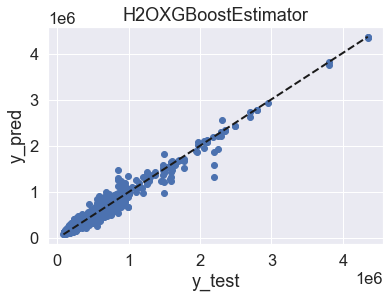

In [113]:
# Plots y relación test, predict.
y_pred = predict.as_data_frame()
y_test = test[-1].as_data_frame()
print("RMSE: ", xgbm_h2o.model_performance(test, predict).rmse())
print("R2: ", xgbm_h2o.model_performance(test, predict).r2())
plt.figure()
plt.title("H2OXGBoostEstimator")
plt.scatter(y_test,y_pred)
plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], 'k--', lw=2)
plt.xlabel("y_test")
plt.ylabel("y_pred");

In [89]:
# Los datos están algo más concentrados, pero algunos precios están muy mal predecidos.
# La gran mayoría de las viviendas están bastante ajustadas, sin embargo hay algún valor atípico.

In [90]:
print(predict, test[-1])

predict
260066
129897
150004
76370.7
129596
290401
206814
107780
120053
233772


buy_price
260000
129900
138000
85000
139000
275000
179000
123000
110000
220000


In [91]:
# A pesar del overfitting que existe en este último modelo, y analizando los plots comparativos de precios.
# parece ser el modelo que más parece ajustarse a los precios reales, y que mejores métricas nos han devuelto.

## Tasación manual.

In [92]:
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
from sklearn import preprocessing

In [93]:
vivienda = {'neighborhood_id': "Malasaña-Universidad, Centro(Madrid)",
            'is_renewal_needed': True,    
            'is_new_development': False, 
            'm2': 90,             
            'n_rooms': 2,     
            'n_bathrooms': 2,        
            'floor': 2,           
            'is_exterior': True,    
            'has_lift': True,   
            'has_parking': True,    
            'has_storage_room': True,    
            'has_terrace': True,        
            'has_balcony': True,      
            'has_pool': True                 
           }

In [94]:
geolocator = Nominatim(user_agent="http")

locate = geolocator.geocode(vivienda["neighborhood_id"], timeout=7)
vivienda["latitude"] = locate.latitude
vivienda["longitude"] = locate.longitude

In [95]:
vivienda.pop("neighborhood_id")

'Malasaña-Universidad, Centro(Madrid)'

In [96]:
piso = pd.DataFrame.from_dict(vivienda, orient='index').T
piso

,is_renewal_needed,is_new_development,m2,n_rooms,n_bathrooms,floor,is_exterior,has_lift,has_parking,has_storage_room,has_terrace,has_balcony,has_pool,latitude,longitude
0,True,False,90,2,2,2,True,True,True,True,True,True,True,40.4267,-3.70423


In [97]:
def transf(column):

    le = preprocessing.LabelEncoder()
    piso[column] = le.fit_transform(piso[column])
    return piso[column]

In [98]:
transf("is_renewal_needed")
transf("is_new_development")
transf("is_exterior")
transf("has_lift")
transf("has_parking")
transf("has_storage_room")
transf("has_terrace")
transf("has_balcony")
transf("has_pool");

In [99]:
piso.to_csv("../outputs/new_piso.csv")

In [100]:
piso = h2o.import_file("../outputs/new_piso.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [101]:
estimated_price = xgbm_h2o.predict(piso)
print(estimated_price)

xgboost prediction progress: |████████████████████████████████████████████| 100%


/usr/local/lib/python3.8/site-packages/h2o/job.py:70: UserWarning: Test/Validation dataset is missing column 'house_type_id': substituting in a column of NaN
  warnings.warn(w)


predict
428216


## Hemos mejorado los datos con respecto al primer test, sin embargo los resultados continúan sin ser los mejores, sobretodo en el caso del RMSE. Donde si hemos mejorado sustancialmente es en la métrica R2 con un 0.97. 
## Vamos a realizar un nuevo análisis acotando los datos y eliminando outliers que nos puedan estar afectando a la hora de predecir los precios.